In [1]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    
    print(len(images), " images to be resized.")
    
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")

In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
print("Scissor image resized (28 X 28)")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("Rock image resized (28 X 28)")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("Paper image resized (28 X 28)")

300  images to be resized.
300  images resized.
Scissor image resized (28 X 28)
300  images to be resized.
300  images resized.
Rock image resized (28 X 28)
300  images to be resized.
300  images resized.
Paper image resized (28 X 28)


In [4]:
def load_data(img_path, number_of_data=4500):
    img_size = 28
    color = 3
    
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 0    # scissor: 0
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 1    # rock: 1
        idx = idx + 1
        
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 2    # paper: 2
        idx = idx + 1
        
    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

In [6]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train / 255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (4500, 28, 28, 3)
y_train shape: (4500,)


라벨:  0


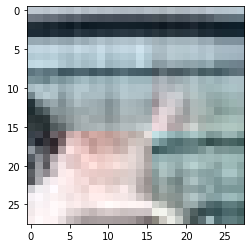

In [7]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [8]:
n_channel_1 = 32
n_channel_2 = 64
n_dense = 64
n_train_epoch = 10

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation = 'relu', input_shape = (28, 28, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [9]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs = n_train_epoch)

Epoch 1/10
141/141 [==============================] - 26s 4ms/step - loss: 0.3020 - accuracy: 0.9067
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9918
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 9.3319e-04 - accuracy: 1.0000
Epoch 5/10
141/141 [==============================] - 0s 3ms/step - loss: 4.9610e-04 - accuracy: 1.0000
Epoch 6/10
141/141 [==============================] - 0s 3ms/step - loss: 2.8240e-04 - accuracy: 1.0000
Epoch 7/10
141/141 [==============================] - 0s 3ms/step - loss: 1.9151e-04 - accuracy: 1.0000
Epoch 8/10
141/141 [==============================] - 0s 3ms/step - loss: 1.4373e-04 - accuracy: 1.0000
Epoch 9/10
141/141 [==============================] - 0s 3ms/step - loss: 1.0170e-04 - accuracy: 1.0000
Epoch 10/10
141/141 [==============================] - 0s 3ms/step - loss: 

In [10]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.


In [13]:
def load_test_data(img_path, number_of_data = 900):
    img_size = 28
    color = 3
    
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 0
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 1
        idx = idx + 1
        
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 2
        idx = idx + 1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

In [14]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test) = load_test_data(image_dir_path)
x_test_norm = x_test / 255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 900 입니다.
x_test shape: (900, 28, 28, 3)
y_test shape: (900,)


In [15]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

29/29 - 0s - loss: 7.9117 - accuracy: 0.1222
test_loss: 7.911733627319336
test_accuracy: 0.12222222238779068


#먼저 제대로 된 EP01을 제출하지 못해 많이 아쉽다. (아래 참조... 시행착오, 주저리주저리..)
 - 아이펠에 연동된 주피터 노트북을 이용해 90%이상 분석/추론 글 작성해 가며 디버깅 중,
 - 커널 연동된 로그인 시간 연장을 하지 못해, 작성 해놓은 프로젝트 모두가 날아감.
 - 이후 로컬에서 파이참+쥬피터노트북 연동하여 환경 구축 하였으나,
 - 파이참 / 윈도우10 환경 경로 설정 오류로 인해 3일간의 구축시간을 날려먹음.
 - 다시 아이펠 클라우드 환경 / 깃헙 연동을 통해 첫번째 프로젝트를 처음과 같은 퀄리티로 작성해보려 했으나,
 - 시간의 압박 + 멘탈의 붕괴로 인한 코드 만 디버깅 하여 제출 함.
 - ML , 환경 구축이 쉽지 않다라는 결론을 얻었고, 클라우드 환경 로그인 연장에 유의하며 다음 프로젝트 부터는
 - 제대로 된 분석 / 코딩을 해야 겠다.